In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, normalize, minmax_scale
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
sns.set()

In [152]:
df = pd.read_csv('london_weather.csv')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [153]:
df.rename(index = df.date, inplace = True)
df.drop(columns = ['date'], axis = 1, inplace = True)

In [154]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [155]:
df.shape

(15341, 9)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15341 entries, 19790101 to 20201231
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       15322 non-null  float64
 1   sunshine          15341 non-null  float64
 2   global_radiation  15322 non-null  float64
 3   max_temp          15335 non-null  float64
 4   mean_temp         15305 non-null  float64
 5   min_temp          15339 non-null  float64
 6   precipitation     15335 non-null  float64
 7   pressure          15337 non-null  float64
 8   snow_depth        13900 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [157]:
df.isnull().sum()

cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [158]:
df.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15322.000000,15341.000000,15322.000000,15335.000000,15305.000000,15339.000000,15335.000000,15337.000000,13900.000000
mean,5.268242,4.350238,118.756951,15.388777,11.475511,7.559867,1.668634,101536.605594,0.037986
std,2.070072,4.028339,88.898272,6.554754,5.729709,5.326756,3.738540,1049.722604,0.545633
min,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


In [159]:
df.dropna(subset = ['cloud_cover', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure',
                    'snow_depth'], axis = 0, inplace = True)

In [160]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [161]:
df.shape

(13843, 9)

In [162]:
df.apply(pd.isnull).sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [163]:
df.duplicated().sum()

np.int64(0)

In [164]:
df.reset_index(drop = True, inplace = True)

In [165]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [166]:
df.describe()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,13843.00000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000,13843.000000
mean,5.32818,4.262609,114.529148,14.951911,11.085408,7.212302,1.667493,101538.493101,0.037853
std,2.03417,3.987488,87.758136,6.510220,5.700936,5.319409,3.733947,1066.084413,0.545712
min,0.00000,0.000000,12.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,4.00000,0.400000,39.000000,10.200000,6.800000,3.200000,0.000000,100900.000000,0.000000
50%,6.00000,3.400000,89.000000,14.400000,10.800000,7.300000,0.000000,101630.000000,0.000000
75%,7.00000,7.100000,180.000000,19.700000,15.550000,11.400000,1.600000,102260.000000,0.000000
max,9.00000,15.700000,352.000000,37.900000,29.000000,22.300000,61.800000,104430.000000,22.000000


In [167]:
cloud_group = df.groupby(['cloud_cover'])
cloud_group.mean()

,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
cloud_cover,,,,,,,,
0.0,10.071010,174.560261,17.411726,11.319870,5.404235,0.057003,102577.882736,0.048860
1.0,10.012157,188.990196,17.775490,12.318627,6.661373,0.166471,102197.784314,0.092157
2.0,8.896635,172.562584,16.402019,11.366756,6.142127,0.278062,102038.977120,0.034993
3.0,7.959289,164.372530,15.964427,11.387352,6.664032,0.674209,101825.306324,0.029644
4.0,6.444000,144.459692,15.120062,10.942831,6.543754,0.973231,101625.950769,0.033231
5.0,5.302839,138.099116,15.582131,11.536761,7.393625,1.381061,101475.677059,0.040484
6.0,3.459785,113.078636,15.384991,11.716194,7.964524,1.861257,101352.448833,0.020826
7.0,1.495354,76.666211,14.419098,11.167749,7.960369,2.252033,101334.895798,0.024940
8.0,0.148402,39.270892,11.834717,8.877342,6.432698,3.234492,101417.992148,0.075154


In [168]:
snow_group = df.groupby(['snow_depth'])
snow_group.mean()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure
snow_depth,,,,,,,,
0.0,5.325744,4.283501,115.298672,15.073081,11.206494,7.324015,1.671899,101540.764011
1.0,5.857143,1.953061,35.469388,3.151020,-0.557143,-3.355102,1.155102,101335.714286
2.0,5.875000,2.258333,43.583333,4.070833,0.095833,-2.466667,0.812500,101441.666667
3.0,5.562500,1.950000,40.187500,3.181250,-0.206250,-3.218750,2.087500,101383.750000
4.0,4.937500,2.925000,45.937500,2.006250,-1.456250,-4.575000,1.137500,101405.625000
5.0,5.000000,2.985714,49.571429,2.000000,-1.685714,-4.371429,0.771429,101095.714286
6.0,4.200000,3.760000,49.200000,3.660000,-0.700000,-4.560000,0.600000,100370.000000
7.0,6.750000,0.100000,19.000000,1.875000,-2.125000,-5.650000,1.275000,100745.000000
8.0,7.500000,0.425000,20.500000,0.300000,-1.800000,-3.625000,2.275000,101837.500000


In [169]:
pd.crosstab(df['cloud_cover'], df['snow_depth'])

snow_depth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,16.0,18.0,20.0,22.0
cloud_cover,,,,,,,,,,,,,,,,,,,
0.0,304,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1.0,503,1,2,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2.0,735,2,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3.0,1003,3,0,1,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4.0,1614,4,1,2,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0
5.0,2124,8,2,3,7,4,0,0,0,0,0,0,0,0,0,0,1,0,0
6.0,2768,8,2,1,1,0,1,2,1,0,0,1,0,0,0,0,0,0,0
7.0,2908,7,5,1,0,2,1,1,0,0,1,0,0,0,0,0,0,1,0
8.0,1743,15,9,6,3,0,0,1,3,0,0,0,2,0,0,1,0,0,0


In [170]:
pd.pivot_table(df, index = 'cloud_cover', columns = 'snow_depth', values = 'mean_temp')

snow_depth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,15.0,16.0,18.0,20.0,22.0
cloud_cover,,,,,,,,,,,,,,,,,,,
0.0,11.458882,0.300000,NaN,-4.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,12.522068,-2.600000,-0.850000,NaN,-2.600000,-2.60,NaN,NaN,NaN,NaN,NaN,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,-4.4
2.0,11.488707,-1.400000,3.600000,-0.900000,NaN,NaN,-1.7,NaN,NaN,-4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,11.494616,-0.100000,NaN,1.200000,-1.333333,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,11.029368,-3.575000,2.000000,-2.400000,-2.500000,NaN,NaN,NaN,NaN,NaN,2.7,NaN,NaN,-0.6,-1.8,NaN,NaN,NaN,NaN
5.0,11.681262,-0.325000,0.600000,-0.066667,-1.128571,-1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.6,NaN,NaN
6.0,11.790860,0.237500,1.750000,1.400000,-2.100000,NaN,1.2,-3.1,-2.600000,NaN,NaN,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,11.247455,-0.285714,-1.380000,0.600000,NaN,-1.90,-1.0,-1.2,NaN,NaN,-1.7,NaN,NaN,NaN,NaN,NaN,NaN,-3.6,NaN
8.0,9.095640,-0.326667,-0.733333,0.633333,-1.400000,NaN,NaN,-1.1,-1.533333,NaN,NaN,NaN,-2.6,NaN,NaN,-2.6,NaN,NaN,NaN


In [171]:
scaled_data_scale = scale(df)
df_scale = pd.DataFrame(data = scaled_data_scale, index = df.index, columns = df.columns)
df_scale

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,-1.636196,0.686520,-0.712543,-1.943463,-2.663765,-2.765877,-0.339463,0.339110,16.423453
1,0.330279,-0.642686,-0.997427,-2.050990,-2.400641,-2.765877,-0.446593,0.930079,14.590918
2,-0.161340,-1.069035,-1.156962,-2.097073,-2.435724,-2.709478,-0.446593,0.479817,7.260775
3,1.313517,-1.069035,-1.156962,-2.342849,-2.400641,-2.577880,-0.446593,-0.655219,3.595704
4,0.330279,-0.567448,-0.974636,-1.436549,-2.084892,-1.619092,-0.446593,0.667426,1.763169
...,...,...,...,...,...,...,...,...,...
13838,1.313517,-1.069035,-1.168357,-0.822108,-0.628938,-0.115111,-0.446593,1.258395,-0.069367
13839,1.313517,-1.069035,-1.168357,-0.776025,-0.523689,-0.115111,-0.446593,1.961929,-0.069367
13840,0.330279,-0.517289,-0.974636,-0.530249,-0.418439,0.035287,-0.446593,1.708657,-0.069367
13841,-2.619434,-0.166178,-0.883473,-0.868191,-0.804354,-1.073899,-0.446593,1.342819,-0.069367


In [172]:
scaled_data_normalize_l2 = normalize(df, norm = 'l2', axis = 0)
df_normalize_l2 = pd.DataFrame(data = scaled_data_normalize_l2, index = df.index, columns = df.columns)
df_normalize_l2

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,0.002981,0.010193,0.003063,0.001199,-0.002796,-0.007113,0.000831,0.008529,0.139842
1,0.008942,0.002475,0.001590,0.000834,-0.001773,-0.007113,0.000000,0.008582,0.124304
2,0.007451,0.000000,0.000766,0.000678,-0.001909,-0.006829,0.000000,0.008542,0.062152
3,0.011922,0.000000,0.000766,-0.000156,-0.001773,-0.006165,0.000000,0.008440,0.031076
4,0.008942,0.002912,0.001708,0.002919,-0.000545,-0.001328,0.000000,0.008558,0.015538
...,...,...,...,...,...,...,...,...,...
13838,0.011922,0.000000,0.000707,0.005003,0.005114,0.006260,0.000000,0.008611,0.000000
13839,0.011922,0.000000,0.000707,0.005160,0.005523,0.006260,0.000000,0.008674,0.000000
13840,0.008942,0.003204,0.001708,0.005994,0.005932,0.007018,0.000000,0.008651,0.000000
13841,0.000000,0.005242,0.002180,0.004847,0.004432,0.001423,0.000000,0.008619,0.000000


In [173]:
scaled_data_normalize_l1 = normalize(df, norm = 'l1', axis = 0)
df_normalize_l1 = pd.DataFrame(data = scaled_data_normalize_l1, index = df.index, columns = df.columns)
df_normalize_l1

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,0.000027,0.000119,0.000033,0.000011,-0.000027,-0.000071,0.000017,0.000072,0.017176
1,0.000081,0.000029,0.000017,0.000008,-0.000017,-0.000071,0.000000,0.000073,0.015267
2,0.000068,0.000000,0.000008,0.000006,-0.000018,-0.000068,0.000000,0.000073,0.007634
3,0.000108,0.000000,0.000008,-0.000001,-0.000017,-0.000062,0.000000,0.000072,0.003817
4,0.000081,0.000034,0.000018,0.000027,-0.000005,-0.000013,0.000000,0.000073,0.001908
...,...,...,...,...,...,...,...,...,...
13838,0.000108,0.000000,0.000008,0.000046,0.000049,0.000063,0.000000,0.000073,0.000000
13839,0.000108,0.000000,0.000008,0.000048,0.000053,0.000063,0.000000,0.000074,0.000000
13840,0.000081,0.000037,0.000018,0.000056,0.000056,0.000070,0.000000,0.000074,0.000000
13841,0.000000,0.000061,0.000023,0.000045,0.000042,0.000014,0.000000,0.000073,0.000000


In [174]:
scaled_data_minmax = minmax_scale(df, feature_range = (0, 1))
df_minmax = pd.DataFrame(data = scaled_data_minmax, index = df.index, columns = df.columns)
df_minmax

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,0.222222,0.445860,0.117647,0.192744,0.095628,0.126100,0.006472,0.701299,0.409091
1,0.666667,0.108280,0.044118,0.176871,0.136612,0.126100,0.000000,0.775679,0.363636
2,0.555556,0.000000,0.002941,0.170068,0.131148,0.134897,0.000000,0.719008,0.181818
3,0.888889,0.000000,0.002941,0.133787,0.136612,0.155425,0.000000,0.576151,0.090909
4,0.666667,0.127389,0.050000,0.267574,0.185792,0.304985,0.000000,0.742621,0.045455
...,...,...,...,...,...,...,...,...,...
13838,0.888889,0.000000,0.000000,0.358277,0.412568,0.539589,0.000000,0.817001,0.000000
13839,0.888889,0.000000,0.000000,0.365079,0.428962,0.539589,0.000000,0.905549,0.000000
13840,0.666667,0.140127,0.050000,0.401361,0.445355,0.563050,0.000000,0.873672,0.000000
13841,0.000000,0.229299,0.073529,0.351474,0.385246,0.390029,0.000000,0.827627,0.000000


In [175]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


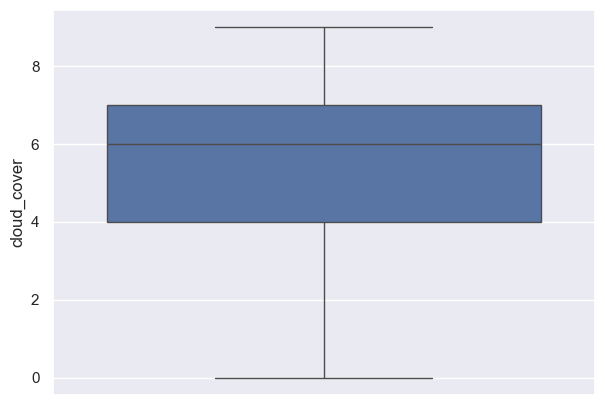

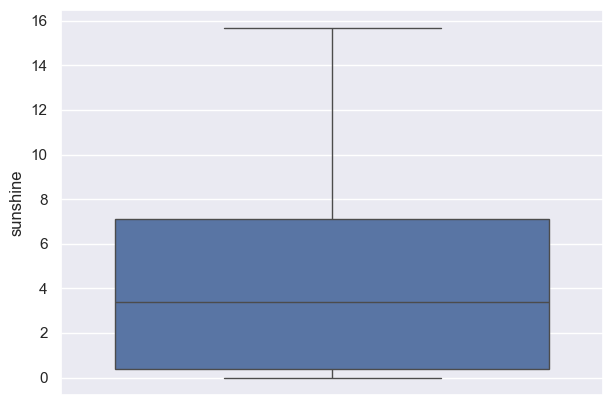

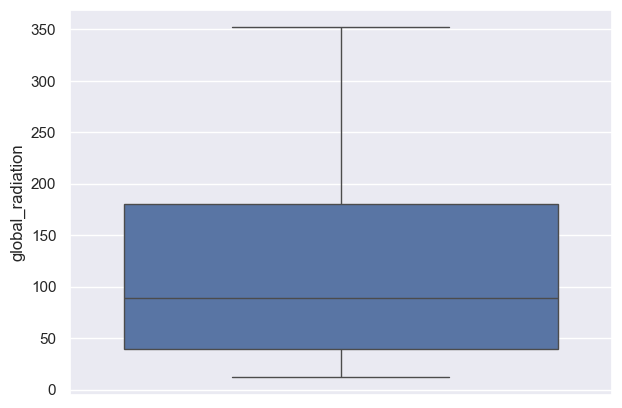

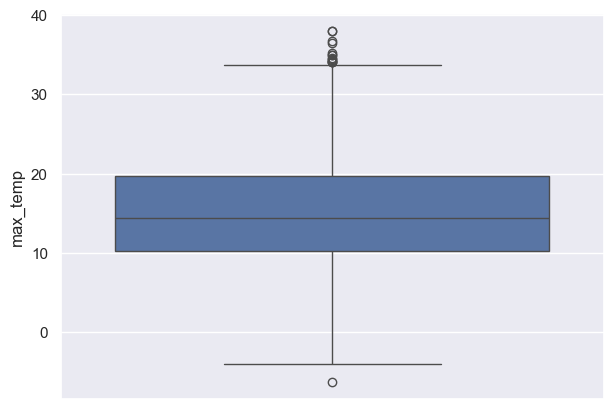

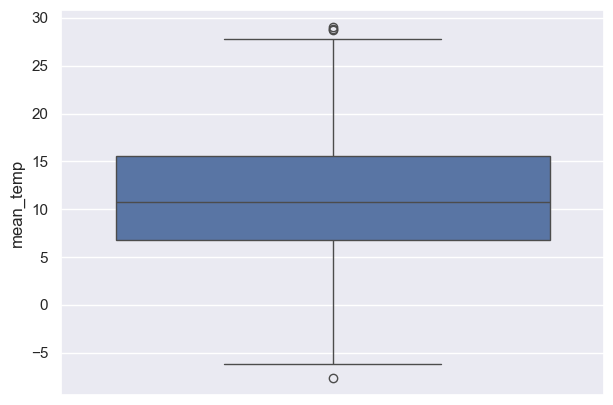

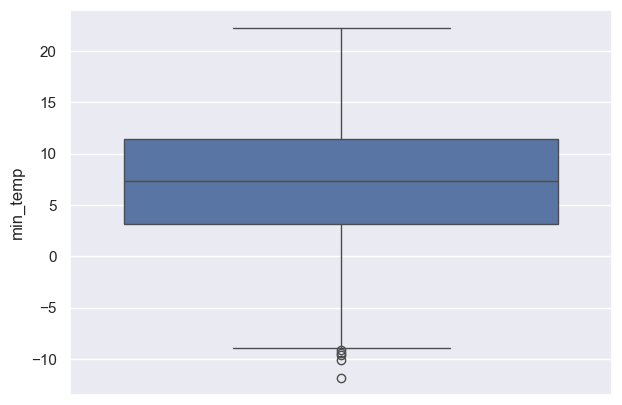

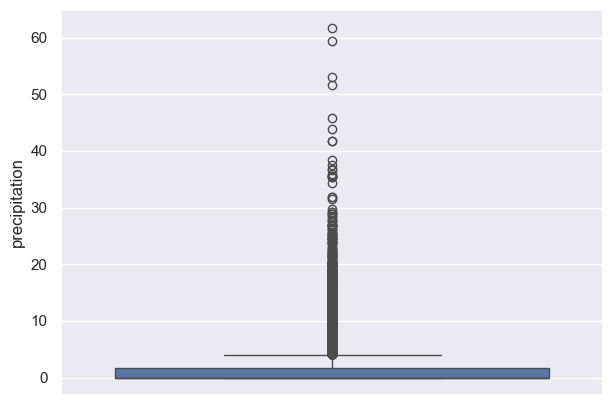

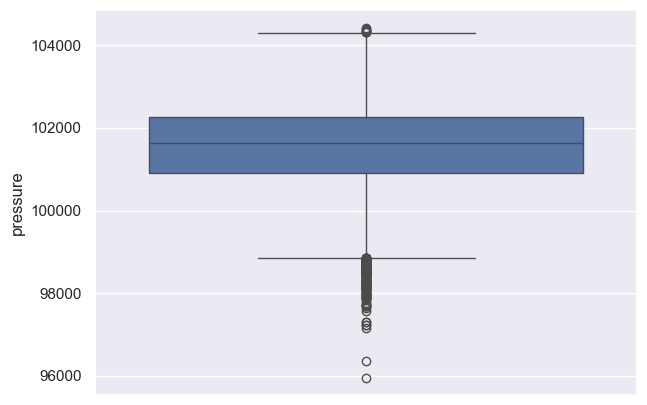

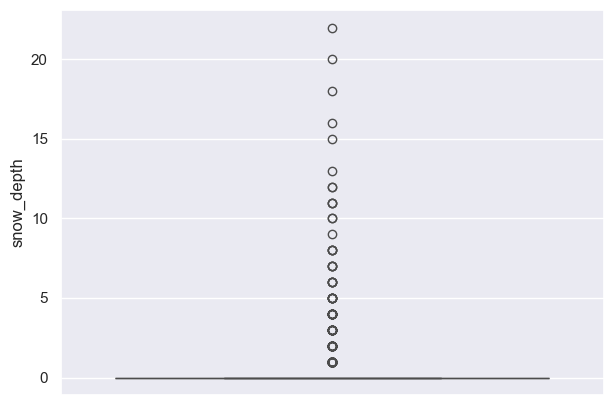

In [176]:
for column in df.columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

In [177]:
df[df['max_temp'] > 33].shape

(23, 9)

In [178]:
df = df[df['max_temp'] < 33]

In [179]:
df[df['max_temp'] < -5].shape

(1, 9)

In [180]:
df = df[df['max_temp'] > -5]

In [181]:
df[df['mean_temp'] > 28].shape

(2, 9)

In [182]:
df = df[df['mean_temp'] < 28]

In [183]:
df[df['mean_temp'] < -6].shape

(2, 9)

In [184]:
df = df[df['mean_temp'] > -6]

In [185]:
df[df['min_temp'] < -8].shape

(8, 9)

In [186]:
df = df[df['min_temp'] > -8]

In [187]:
df[df['precipitation'] > 3].shape

(2379, 9)

In [188]:
df.shape

(13803, 9)

In [189]:
df = df[df['precipitation'] < 3]

In [190]:
df.shape

(11347, 9)

In [191]:
df[df['pressure'] > 104000].shape

(49, 9)

In [192]:
df = df[df['pressure'] < 104000]

In [193]:
df[df['pressure'] < 99000].shape

(124, 9)

In [194]:
df = df[df['pressure'] > 99000]

In [195]:
df[df['snow_depth'] > 1].shape

(68, 9)

In [196]:
df = df[df['snow_depth'] < 1]

In [197]:
df.shape

(11059, 9)

In [198]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
7,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0,0.0
15,8.0,0.0,15.0,1.9,2.1,1.6,2.5,102220.0,0.0
16,8.0,0.0,15.0,3.0,0.8,-0.2,0.2,101860.0,0.0
18,7.0,0.0,16.0,3.5,3.1,-1.0,0.0,100920.0,0.0
24,4.0,2.1,39.0,4.5,-1.8,-5.2,0.0,99770.0,0.0


In [199]:
df['snow_depth'].value_counts()

snow_depth
0.0    11059
Name: count, dtype: int64

In [200]:
df.drop(columns = ['snow_depth'], axis = 1, inplace = True)

In [201]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure
7,8.0,0.1,15.0,5.8,6.9,5.3,0.8,101870.0
15,8.0,0.0,15.0,1.9,2.1,1.6,2.5,102220.0
16,8.0,0.0,15.0,3.0,0.8,-0.2,0.2,101860.0
18,7.0,0.0,16.0,3.5,3.1,-1.0,0.0,100920.0
24,4.0,2.1,39.0,4.5,-1.8,-5.2,0.0,99770.0


In [202]:
df['precipitation'].value_counts()

precipitation
0.0    7015
0.2     881
0.4     379
0.1     306
0.6     255
0.8     196
1.0     185
1.2     177
1.4     149
0.3     132
1.6     131
1.8     127
2.8     116
2.0     115
2.2     111
2.4      98
0.5      89
0.9      76
2.6      73
0.7      64
1.5      58
1.1      51
2.1      45
1.7      45
1.3      39
1.9      37
2.9      31
2.5      27
2.7      26
2.3      25
Name: count, dtype: int64

In [203]:
df['precipitation'].unique()

array([0.8, 2.5, 0.2, 0. , 0.1, 2.4, 0.6, 1.8, 0.9, 2.8, 1.1, 0.5, 0.7,
       1. , 1.9, 1.4, 2.9, 0.4, 1.3, 2. , 2.1, 1.2, 2.2, 0.3, 2.3, 2.6,
       1.6, 2.7, 1.5, 1.7])

In [204]:
df['precipitation'].nunique()

30

In [205]:
df.reset_index(drop = 'first', inplace = True)

In [206]:
X = df.drop(columns = ['precipitation'], axis = 1)
y = df['precipitation']

In [207]:
X.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure
0,8.0,0.1,15.0,5.8,6.9,5.3,101870.0
1,8.0,0.0,15.0,1.9,2.1,1.6,102220.0
2,8.0,0.0,15.0,3.0,0.8,-0.2,101860.0
3,7.0,0.0,16.0,3.5,3.1,-1.0,100920.0
4,4.0,2.1,39.0,4.5,-1.8,-5.2,99770.0


In [208]:
y

0        0.8
1        2.5
2        0.2
3        0.0
4        0.0
        ... 
11054    0.0
11055    0.0
11056    0.0
11057    0.0
11058    0.0
Name: precipitation, Length: 11059, dtype: float64

In [209]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.39511827, -1.13922259, -1.20643834, ..., -0.77825722,
        -0.38775332,  0.13467435],
       [ 1.39511827, -1.16374654, -1.20643834, ..., -1.61826763,
        -1.09022369,  0.50941629],
       [ 1.39511827, -1.16374654, -1.20643834, ..., -1.84577045,
        -1.43196603,  0.12396744],
       ...,
       [ 0.43101073, -0.62421971, -1.05044457, ..., -0.46325332,
         0.01094608,  1.73000432],
       [-2.46131188, -0.28088446, -0.96130528, ..., -0.84825809,
        -1.10920938,  1.31243473],
       [ 0.9130645 , -1.16374654, -1.22872316, ..., -0.74325679,
        -0.46369606,  1.51586607]])

In [210]:
df_scaled = pd.DataFrame(data = X_scaled, index = X.index, columns = X.columns)
df_scaled.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure
0,1.395118,-1.139223,-1.206438,-1.455836,-0.778257,-0.387753,0.134674
1,1.395118,-1.163747,-1.206438,-2.047445,-1.618268,-1.090224,0.509416
2,1.395118,-1.163747,-1.206438,-1.880581,-1.845770,-1.431966,0.123967
3,0.913064,-1.163747,-1.195296,-1.804734,-1.443265,-1.583852,-0.882482
4,-0.533097,-0.648744,-0.939020,-1.653039,-2.300776,-2.381250,-2.113777


In [211]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.2, random_state = 101, shuffle = True,
                                                   stratify = y)

In [212]:
print('The size of training set:', X_train.shape[0])
print('The size of test set:', X_test.shape[0])

The size of training set: 8847
The size of test set: 2212


In [213]:
X_train.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure
3033,-0.051043,1.509364,1.880010,1.699412,1.689273,1.358930,1.012641
9770,0.913064,-1.065651,-0.281618,1.684242,1.409270,1.264001,-0.807534
4957,0.913064,-1.163747,-1.217581,-0.560838,-0.935759,-0.672539,0.295278
7162,-1.015151,2.465798,2.325706,1.365684,2.371782,1.833572,-0.871775
9582,-1.497204,0.111499,-0.894451,-0.803549,-1.355764,-1.337038,-0.668344


In [214]:
X_test.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure
1448,-0.533097,0.013403,-0.705030,-0.894566,-1.320764,-1.299066,-1.921053
351,1.395118,-1.114699,-0.482182,-0.591177,-0.480754,-0.368768,0.177502
3057,-1.979258,2.465798,2.325706,1.456700,1.479271,0.789359,0.616485
7888,-0.051043,-0.329932,-0.983590,-0.606346,-0.445753,-0.235868,0.766382
10234,0.431011,-0.943031,-0.894451,0.410008,-0.585755,-0.805438,0.541537
